# Problem Statement:  Monitor the behavioural and personality traits of the employee to identify and predict the signs of burnout. Starting with the causes of burnout, it should be possible to predict burnout in the early stages.

In [77]:
#importing files
import matplotlib.pyplot as plt
import numpy as mp
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as s

In [78]:
#DATA COLLECTION
df_full = pd.read_csv(r"C:\Users\ritik\Downloads\train.csv",index_col='Employee ID')
df_test = pd.read_csv(r"C:\Users\ritik\Downloads\test.csv",index_col='Employee ID')
df_full.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [79]:
df_full.dtypes

Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [80]:
#grouping of all data

#data of joining
df_full['Date of Joining'] = pd.to_datetime(df_full['Date of Joining'])
df_test['Date of Joining'] = pd.to_datetime(df_test['Date of Joining'])

#company type
company_type = {'Service': 2 , 'Product': 1}
df_full['Company Type'] = [company_type[j] for j in  df_full['Company Type']]
df_test['Company Type'] = [company_type[j] for j in  df_test['Company Type']]

#gender 
gender = { 'Female': 2 , 'Male': 1 }
df_full['Gender'] = [gender[j] for j in  df_full['Gender']]
df_test['Gender'] = [gender[j] for j in  df_test['Gender']] 

#Designation
df_full['Designation'] = df_full['Designation'].astype('Int64')
df_test['Designation'] = df_test['Designation'].astype('Int64')

#WFH setup
wfh = { 'Yes': 0 , 'No': 1 }
df_full['WFH Setup Available'] = [wfh[j] for j in  df_full['WFH Setup Available']]
df_test['WFH Setup Available'] = [wfh[j] for j in  df_test['WFH Setup Available']]

In [81]:
df_full.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [82]:
# finding all null data
df_full.isnull().sum()

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [83]:
# removing all null data
df_full = df_full.dropna()

In [84]:
# no null data left
df_full.isnull().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [88]:
#finding pairwise correlation in columns
df_full[['Mental Fatigue Score','Resource Allocation','Designation','Burn Rate']].corr() 

,Mental Fatigue Score,Resource Allocation,Designation,Burn Rate
Mental Fatigue Score,1.000000,0.799563,0.691823,0.944389
Resource Allocation,0.799563,1.000000,0.877893,0.855005
Designation,0.691823,0.877893,1.000000,0.736412
Burn Rate,0.944389,0.855005,0.736412,1.000000


Text(0.5, 1.0, 'Resource Allocation')

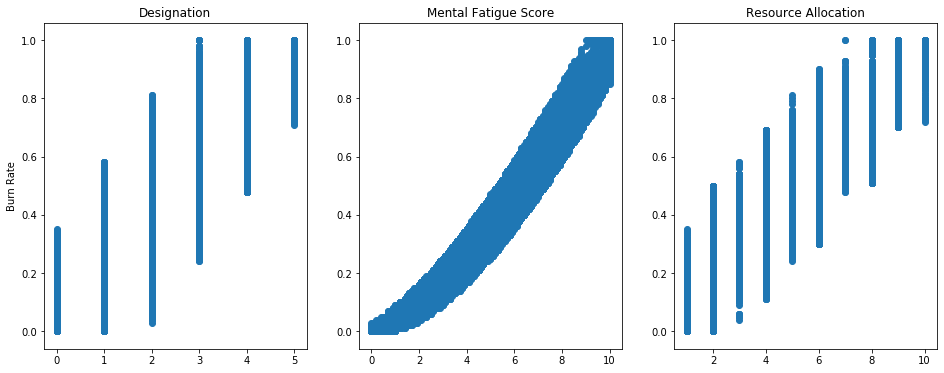

In [95]:
fig, axs = plt.subplots(1,3,figsize=(16,6))
axs[0].set(ylabel='Burn Rate')
axs[0].scatter(df_full['Designation'],df_full['Burn Rate'])
axs[0].set_title('Designation')
axs[1].scatter(df_full['Mental Fatigue Score'],df_full['Burn Rate'])
axs[1].set_title('Mental Fatigue Score')
axs[2].scatter(df_full['Resource Allocation'],df_full['Burn Rate'])
axs[2].set_title('Resource Allocation')